# Google App Store: App Data

Situation -  Developers of apps of Google App Store want to predict the success of their app and incorporate features which makes an app successful. 

1 - Data
Data Comprises: We have the data from the of the dataset for app store such as different category apps, type of app, ratings, reviews, size of an app, installs made so far, and price of each app category

2 - Descriptive Analysis 
Data cleaning 
Analysis of Overall Usder Ratings on app in the app store 
Data Standardization
Visualization of average rating for different category apps in the app store
Descriptive Analysis - "Summarizing via visualization"

3 - Data Modeling
Building a model by splitting the data into Train and Test while keeping the Rating as the target variable

### Import the Required Libraries and Load the Dataset

In [410]:
import math
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
path = 'C:\\Users\\ASUS\\Downloads\\'

In [454]:
# 1.1 Loading the dataset
f = pd.read_csv(path +'GAppdata.csv')
f.iloc[0:16]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [442]:
# shape of a dataframe
f.shape

(10841, 13)

### Checking the Dataset: DataType and Column-wise

In [443]:
# check for columns present in a dataframe
for col_names in f.columns:
    print(col_names)

App
Category
Rating
Reviews
Size
Installs
Type
Price
Content Rating
Genres
Last Updated
Current Ver
Android Ver


In [444]:
# Datatypes for each column
f.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [445]:
# Numeric and object datatypes
f.dtypes.value_counts()

object     12
float64     1
dtype: int64

 12 object types and Rating is of float64 type

In [446]:
# Summary Statistics for a numeric value only: "Rating"
f.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:ylabel='Rating'>

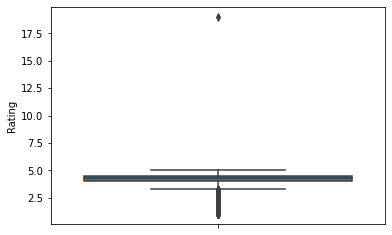

In [252]:
sns.boxplot(y = f['Rating'])

The above boxplot on "Rating" shows that most of my data is concentrated between 2.5 and 5.0. Besides we have one outlifer after 17.5 rating.

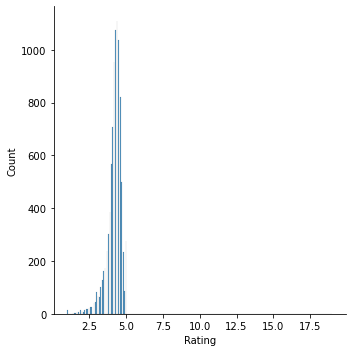

In [437]:
sns.displot(f['Rating'])

In [438]:
print(f['Rating'].skew())

0.5956367473804342


In [439]:
print(f.mean())

Rating    4.193338
dtype: float64


In [440]:
print(f.median())

Rating    4.3
dtype: float64


In [441]:
print(f.mode())

      App Category  Rating Reviews                Size    Installs  Type  \
0  ROBLOX   FAMILY     4.4       0  Varies with device  1,000,000+  Free   

  Price Content Rating Genres    Last Updated         Current Ver Android Ver  
0     0       Everyone  Tools  August 3, 2018  Varies with device  4.1 and up  


### Data Cleaning

In [447]:
# Null-Value Check: Info on each column to check if there are null values
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


For null-value check

From the shape, it was seen that we have 10841 rows and the null-value count for each column is as follows:
1. App, category, Reviews, Size, Installs, Price, Genres, Last Updated have no null values
2. Rating has 9367 not-null and 1204 null values
3. Content Rating has 10840 not-null and 1 null value
4. Current Ver has 10833 not-null and 8 null values
5. Android Ver has 10838 not-null and 3 null values
6. Type has 10840 not-null and 1 null value

In [448]:
# check for alphanuemric datatypes
f[f.Reviews.str.isdigit()].head(3)

# In entire dataframe having 10840 rowsand 13 columns there is alphanumeric datatype that needs to be worked on!

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [455]:
# <!-- Now, in the above boxplot for "Rating", I saw that there was an outlier, meaning, the maximum rating is "5", so we need to drop that particular outlier  -->
f[f['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


I see that row 10472 has an outlier which means the rating is "19.0", which is quite an nteresting thing to note

Another thing, I noted here is, "Reviews" has a Strong format, which is "3.0M"

So, I have already analyzed for "Reviews". Now, I will do for "Reviews" and if both of these verify that the "row 10472" is not valid, so I will entirely drop this row

Now, one more thing I can do here is, I can categorise my Rating into Rating_Category of "High" for rating > 3.5 and "Low" for rating < 3.5

Hence, the skewness of "Reviews" got reduced from 15.30 to nan

In [456]:
f1 = f.copy()
f1.drop([10472],inplace = True)

In [457]:
# Now, let us check if we have successfully dropped this row
f1.loc[10470:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [268]:
# <!-- Yeah, we were successful in dropping row "10472" permanantly, and let us check the shape of our dataset now -->
f1.shape

# So, now we have 10840 row, however, the columns count remain unchanged

(10840, 13)

<AxesSubplot:xlabel='Reviews'>

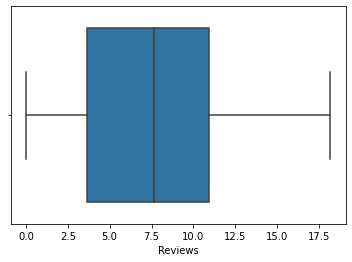

In [269]:
sns.boxplot(x = f1['Reviews'])

After dropping the row 10472, I see that review having a string value of '3.0M' got dropped as well and the plot for the same shows no "outlier" now

<AxesSubplot:ylabel='Rating'>

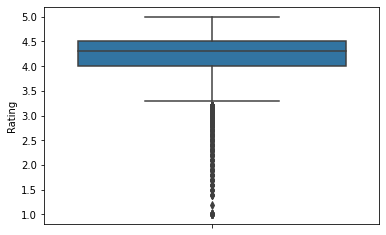

In [20]:
# <!-- Now, we will see the boxplot for "Rating" column to see how if outlier detection occurs -->
sns.boxplot(y = f1['Rating'])

The above boxplot for "Rating" shows me true value from "0" to "5" ("19" got removed when we dropped "10472" row number). Most of the rating made by people can be viewed as "Median" which is between 4.0 and 4.5. 

<AxesSubplot:>

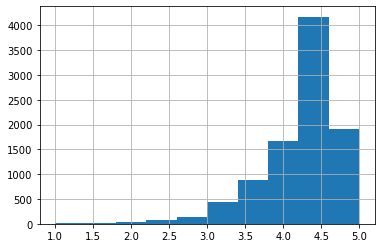

In [270]:
f1['Rating'].hist()
# We can set Grid = False, if we do not need it on our histogram

The above distribution graph shows that "Rating_Category" is at peak between 4.0 and 4.5. However, to get more clear picture of which rating either lesser than 3.5 or greater than 3.5 is given for apps on Google App Store

Now, the above histogram for "Rating" shows that the graph is rightly-skewed with no "outlier" presence 

### Data Manipulation and Imputation

#### Check for null values

In [271]:
f1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
# Null values in Rating: 1474
# Type = 1
# Genres = 1
# Current Ver = 8
# Android Ver = 3

In [272]:
# For empty data > 90%, we must check the null_percent value in our dataset"
# Precentage of Null Values
per_of_null_rating_values = (f1.isna().sum())/len(f1) * 100
per_of_null_rating_values

App                0.000000
Category           0.000000
Rating            13.597786
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009225
Price              0.000000
Content Rating     0.000000
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073801
Android Ver        0.018450
dtype: float64

threshold = len(f1)*0.45
threshold is 4878.45

f1.dropna(thresh = threshold, axis = 1, inplace = True)

axis = 1 (for dropping a column with missing values > 45%)
axis = 0 (for dropping a row with missing values > 45%)

We can perform the below operations only when null_percent > 45%, since the null_percent is max at 13.596% for "Rating", we do not need dropping here

##### Check if there are any duplicate records in the dataset? if any drop them. 

In [273]:
f = f.duplicated()
sum(f)
f = f.drop_duplicates()
f = f.duplicated()
sum(f)

0

No duplicates are found

#### Fill Null values with mean/median/mode

In [274]:
# defining a function called impute_median: Making a common median and impute it on all the missing values in our dataset
def impute_median(series):
    return series.fillna(series.median())

In [275]:
#  Now, let us check if we have successfully imputed values by executing the above code on "null value" check
f1.isna().sum()

# Now, let us follow a solid approach to succeed our "null value imputation" task

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [276]:
f1.Rating = f1['Rating'].transform(impute_median)
#  we called a function"impute_median" here

# or

f1.Rating = f1['Rating'].fillna(f1['Rating'].median())

Here, I used impute_median wherein it takes a series, which is actually a "Rating" column here and perform an operation which is one of the Pandas Series operation called series.fillna and fills up all the missing values with the median value of the "Rating" series itself with the help of Pandas function "median()".

Also, I imputed missing values with "Median" because my displot and hist is right-skewed

In [277]:
# Now, let us recheck if we were able to impute the null values
f1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

So, the numeric null values got imputed by numeric values and we are having '0' null values in Rating

For categorical values, we need to check if we have "Bimodal values or redundant values" 

In [278]:
print(f1['Type'].mode())
print(f1['Current Ver'].mode())
print(f1['Android Ver'].mode())
print(f1['Genres'].mode())
print(f1['Content Rating'].mode())

0    Free
Name: Type, dtype: object
0    Varies with device
Name: Current Ver, dtype: object
0    4.1 and up
Name: Android Ver, dtype: object
0    Tools
Name: Genres, dtype: object
0    Everyone
Name: Content Rating, dtype: object


No, bimodal values found, so we have unimodal data here 

In [279]:
f1['Type'].fillna(str(f1['Type'].mode().values[0]),inplace = True)
f1['Current Ver'].fillna(str(f1['Current Ver'].mode().values[0]),inplace = True)
f1['Android Ver'].fillna(str(f1['Android Ver'].mode().values[0]),inplace = True)
f1['Genres'].fillna(str(f1['Genres'].mode().values[0]),inplace = True)
f1['Content Rating'].fillna(str(f1['Content Rating'].mode().values[0]),inplace = True)

In [280]:
f1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [281]:
# Sucessfully, my data has no "null values" now and one row was deleted already '10472' with an Outlier of '19' Rating
f1.shape

(10840, 13)

Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [282]:
print(f1['Category'].nunique())
print(f1['Category'].value_counts())

33
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64


All '33' categories are unique here

<!-- Now, there are some columns that need to be deleted as these all have redundancy -->

I got a new column as a "Rating Category", categorised as "High" and "Low" for > than 3.5 and < 3.5, respectively

In [283]:
# Splitting the string and retriveing the numeric value.
f1['Price'] = f1['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))               
f1['Price'] = f1['Price'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))

f1['Price'] = f1['Price'].apply(lambda x: float(x))

f1.head(2)
## Replacing comma,'$', and ',' and converting feature 'Price' as a float.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [284]:
# Now, let us create a new column compiring Rating Category as >3.5 and lower ones with an 'if' condition
data = {'>3.5': 'Low', '<3.5':'High'}
f1['Rating_Category'] = np.where(f1['Rating'] > 3.5,'High','Low')
f1.iloc[13:16,:]

# Usng np.where, I got a new column showing High and Low ratings for > and < 3.5, respectively

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,8.372399,21M,"100,000+",Free,0.0,Everyone,Art & Design,"June 26, 2018",1.0.4,4.4 and up,High
14,3D Color Pixel by Number - Sandbox Art Coloring,ART_AND_DESIGN,4.4,7.325149,37M,"100,000+",Free,0.0,Everyone,Art & Design,"August 3, 2018",1.2.3,2.3 and up,High
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,4.007333,2.7M,"5,000+",Free,0.0,Everyone,Art & Design,"June 6, 2018",Varies with device,4.2 and up,Low


In [285]:
f1.drop(f1[f1['Size'] == 'Varies with device'].index,inplace = True)

f1['Size'] = f1['Size'].replace({'k': '*1e3', 'M': '*1e6', 'm':'1e6'}, regex=True)

f1['Size'] = f1['Size'].map(pd.eval).astype(int)
f1.iloc[13:16]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,8.372399,21000000,"100,000+",Free,0.0,Everyone,Art & Design,"June 26, 2018",1.0.4,4.4 and up,High
14,3D Color Pixel by Number - Sandbox Art Coloring,ART_AND_DESIGN,4.4,7.325149,37000000,"100,000+",Free,0.0,Everyone,Art & Design,"August 3, 2018",1.2.3,2.3 and up,High
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,4.007333,2700000,"5,000+",Free,0.0,Everyone,Art & Design,"June 6, 2018",Varies with device,4.2 and up,Low


In [286]:
## Splitting the string and retriveing the numeric value.
f1['Installs'] = f1['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))               
f1['Installs'] = f1['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
f1['Installs'] = f1['Installs'].replace('Free',1000000)

f1['Installs'] = f1['Installs'].apply(lambda x: float(x))

f1.head(2)
## Replacing comma,'Free', and '+' and converting feature 'Installs' as a float.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High


In [287]:
f1['Reviews']
# Here, Reviews has -infinity and NaN Review under some categories that we need to work on

0         5.068904
1         6.874198
2        11.379508
3        12.281384
4         6.874198
           ...    
10835         -inf
10836     3.637586
10837     1.386294
10838     1.098612
10840    12.894978
Name: Reviews, Length: 9145, dtype: float64

In [288]:
f1['Reviews'].median()

6.60934924316738

In [289]:
k = f1['Reviews'].median()
f1.replace([np.nan,-np.inf],k,inplace = True)
f1.describe()
# filedf['Reviews'].fillna(filedf['Reviews'].median())

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9145.000000,9.145000e+03,9.145000e+03,9145.000000
mean,4.193384,7.049306,2.151653e+07,7.114842e+06,1.184366
std,0.502702,3.894252,2.258875e+07,4.619357e+07,17.355754
min,1.000000,0.000000,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,3.951244,4.900000e+06,1.000000e+03,0.000000
50%,4.300000,6.609349,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,10.128110,3.000000e+07,1.000000e+06,0.000000
max,5.000000,17.619812,1.000000e+08,1.000000e+09,400.000000


###### Hence, we have got a clean data with no null, or irrelevant data as NaN or -inf. Hence, our data is now ready for visualization

## Data Visualization

Now, let us group each category type as per Rating, Reviews, and their price

In [290]:
grp = f1.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)

print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.172000
BEAUTY                 4.293617
BOOKS_AND_REFERENCE    4.314721
BUSINESS               4.189250
COMICS                 4.137255
COMMUNICATION          4.143019
DATING                 4.020755
EDUCATION              4.386486
ENTERTAINMENT          4.146667
EVENTS                 4.419298
FAMILY                 4.203111
FINANCE                4.137134
FOOD_AND_DRINK         4.130000
GAME                   4.270739
HEALTH_AND_FITNESS     4.235606
HOUSE_AND_HOME         4.186765
LIBRARIES_AND_DEMO     4.226829
LIFESTYLE              4.132464
MAPS_AND_NAVIGATION    4.048148
MEDICAL                4.213594
NEWS_AND_MAGAZINES     4.177778
PARENTING              4.338889
PERSONALIZATION        4.319155
PHOTOGRAPHY            4.157874
PRODUCTIVITY           4.178878
SHOPPING               4.235821
SOCIAL                 4.263810
SPORTS                 4.224437
TOOLS                  4.052097
TRAVEL_AND_LOCAL       4.085938

Now, these categories are grouped as per Ratings, Reviews, and their individual prices

In the above data description, Education category app has got the highest rating of 4.38 and the price for this category apps  on total is 17.96.

The second highest rating is given to Art_and_Design with a rating "4.35" with price of 5.97

Following this, the third highest rating is given to Books_and_Reference and the sum of the price is 116.78

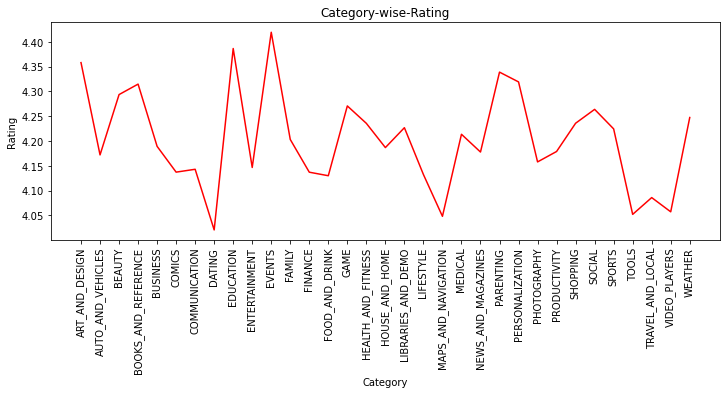

In [291]:
plt.figure(figsize = (12,4))
plt.plot(x,"r-",color = 'r')
plt.xticks(rotation = 90)
plt.title("Category-wise-Rating")
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

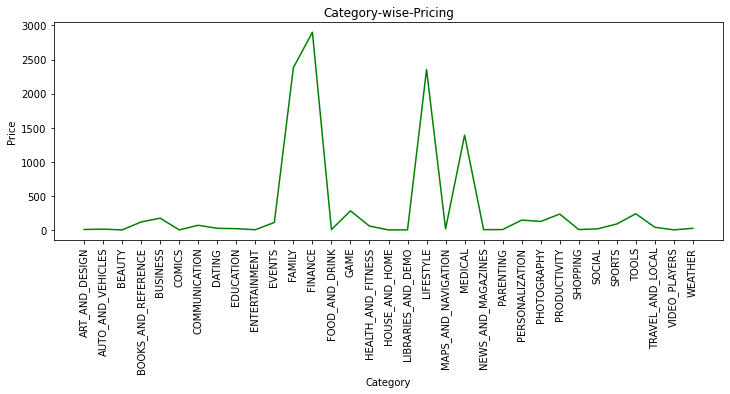

In [292]:
plt.figure(figsize = (12,4))
plt.plot(y,"r-",color = 'g')
plt.xticks(rotation = 90)
plt.title("Category-wise-Pricing")
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

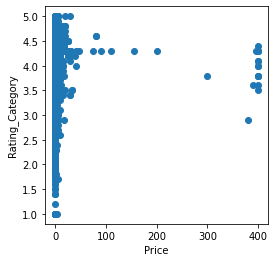

In [293]:
fig, ax = plt.subplots(figsize=(4,4))   # setting the figure size of the plot
ax.scatter(f1['Price'], f1['Rating'])  # scatter plot
ax.set_xlabel('Price')
ax.set_ylabel('Rating_Category')
plt.show()

Inference:
The lesser is the price, higher is the rating and the higher the price, lower is the rating

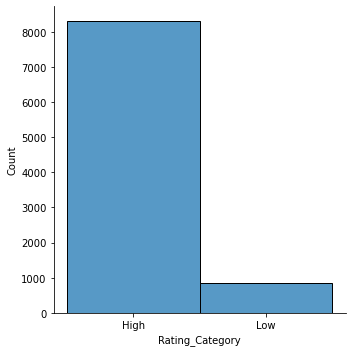

In [294]:
sns.displot(f1['Rating_Category'])

We can infer that "High" rating category have got higher count than the ones with the "Low" category. Meaning, if developers reduce the price of the apps, this is possible that if they incorporate new features into apps, the user will continue to give rating higher than "3.5"

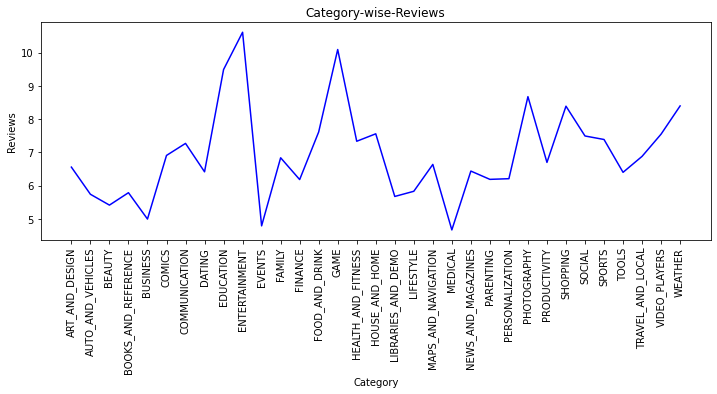

In [295]:
plt.figure(figsize = (12,4))
plt.plot(z,"r-",color = 'b')
plt.xticks(rotation = 90)
plt.title("Category-wise-Reviews")
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.show()

Inferences:
1. The Entertainment category app got the highest reviews, i.e., 10.6
2. The second highest was "Game" with average reviews of '10.09'
3. The third highest was "Education" with average reviews of '9.489'

### Method 1 for Encoding: Label Encoding + Standardisation

As per the question text, we need to drop the following columns, so intead of affecting my current dataframe, I will make a copy and drop the columns from my copied dataframe
App
Rating
Current Ver
Android Ver
Last Updated
Genres

In [296]:
fdrop = f1.copy()
fdrop.drop(['App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver'],axis = 1,inplace = True)
fdrop

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category
0,ART_AND_DESIGN,5.068904,19000000,10000.0,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.874198,14000000,500000.0,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379508,8700000,5000000.0,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.281384,25000000,50000000.0,Free,0.0,Teen,High
4,ART_AND_DESIGN,6.874198,2800000,100000.0,Free,0.0,Everyone,High
...,...,...,...,...,...,...,...,...
10835,BUSINESS,6.609349,9600000,10.0,Free,0.0,Everyone,High
10836,FAMILY,3.637586,53000000,5000.0,Free,0.0,Everyone,High
10837,FAMILY,1.386294,3600000,100.0,Free,0.0,Everyone,High
10838,MEDICAL,1.098612,9500000,1000.0,Free,0.0,Everyone,High


#### Label Encoding of the categorical columns

In [308]:
#Scales the data. Essentially returns the z-scores of every attribute

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
std_scale = StandardScaler()

std_scale

StandardScaler()

In [309]:
cols = ['Category','Type','Content Rating','Rating_Category']
fdrop[cols] = fdrop[cols].apply(LabelEncoder().fit_transform)
fdrop.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category
0,0,5.068904,19000000,10000.0,0,0.0,1,0
1,0,6.874198,14000000,500000.0,0,0.0,1,0


#### Variabes need to be scaled before further analysis . Transformation seems unnecessary as most data points don't show any clear trend with Rating Category. Still checkking effect of Min-Max Scaling on the data set, which returns z-scores of the values of the attribute

In [310]:
# Standardising values

flabel = fdrop.copy()

flabel['Category'] = std_scale.fit_transform(flabel[['Category']]) 
flabel['Reviews'] = std_scale.fit_transform(flabel[['Reviews']]) 
flabel['Size'] = std_scale.fit_transform(flabel[['Size']]) 
flabel['Installs'] = std_scale.fit_transform(flabel[['Installs']]) 
flabel['Type'] = std_scale.fit_transform(flabel[['Type']])
flabel['Price'] = std_scale.fit_transform(flabel[['Price']])
flabel['Content Rating'] = std_scale.fit_transform(flabel[['Content Rating']])
flabel['Rating_Category'] = std_scale.fit_transform(flabel[['Rating_Category']])

flabel.head()
# returns z-scores of the values of all attributes

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category
0,-2.001672,-0.508573,-0.111412,-0.153814,-0.293216,-0.068244,-0.452515,-0.318031
1,-2.001672,-0.044968,-0.332774,-0.143206,-0.293216,-0.068244,-0.452515,-0.318031
2,-2.001672,1.112008,-0.567417,-0.045785,-0.293216,-0.068244,-0.452515,-0.318031
3,-2.001672,1.343612,0.154221,0.928430,-0.293216,-0.068244,2.567370,-0.318031
4,-2.001672,-0.044968,-0.828623,-0.151866,-0.293216,-0.068244,-0.452515,-0.318031


### Method 2 for Encoding: Log Transformation

#### Bivariate Analysis

In [303]:
fba = fdrop.copy()
rs = np.random.RandomState(0)
fba = pd.DataFrame(rs.rand(10, 10))
corr = fba.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


####  Multivariate Analysis and Scatter Plot

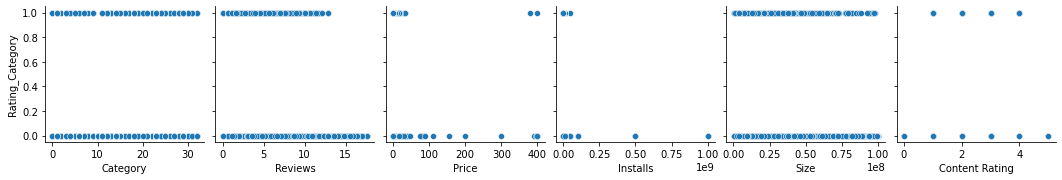

In [304]:
sns.pairplot(fdrop, y_vars = 'Rating_Category', x_vars = ["Category",'Reviews','Price','Installs','Size','Content Rating'])
                                                             
plt.show()

Inference: Very less relationship can be seen between Rating_Category and 'Category, Reviews, Price, 'Installs, Size, and Content Rating'


#### Variabes need to be scaled before further analysis . Transformation seems unnecessary as most data points don't show any clear trend with Rating Category. Still checkking effect of log transformation on the data set.

In [413]:
# Taking 'fml' as a variable that indicates log in of values for the Machine Learning Process
fml = fdrop.copy()

In [414]:
D1 = np.log(fml['Category'])
D2 = np.log(fml['Reviews'])
D3 = np.log(fml['Size'])
D4 = np.log(fml['Installs'])
D5 = np.log(fml['Type'])
D6 = np.log(fml['Price'])
D7 = np.log(fml['Content Rating'])
D8 = np.log(fml['Rating_Category'])

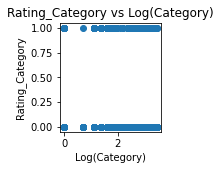

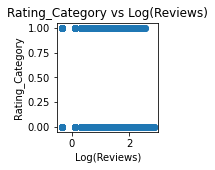

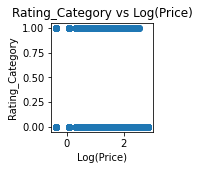

In [415]:
plt.figure(figsize = (4,2))
plt.subplot(1, 2, 1)
plt.title('Rating_Category vs Log(Category)')
plt.scatter( D1, fml['Rating_Category'])
plt.xlabel('Log(Category)')
plt.ylabel('Rating_Category')


plt.figure(figsize = (4,2))
plt.subplot(1, 2, 2)
plt.title('Rating_Category vs Log(Reviews)')
plt.scatter( D2, fml['Rating_Category'])
plt.xlabel('Log(Reviews)')
plt.ylabel('Rating_Category')
plt.show()

plt.figure(figsize = (4,2))
plt.subplot(1, 2, 2)
plt.title('Rating_Category vs Log(Price)')
plt.scatter( D2, fml['Rating_Category'])
plt.xlabel('Log(Price)')
plt.ylabel('Rating_Category')
plt.show()

#### Plotting a heatmap to check for 'X' variables having a good correlation with our Target variable 'Y' - 'Rating_Category'

<AxesSubplot:>

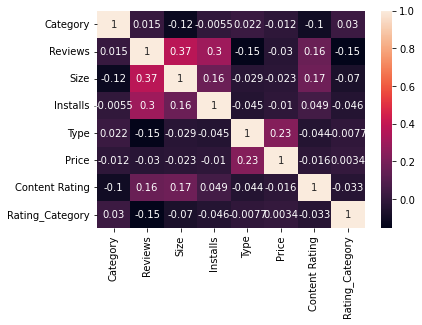

In [416]:
ls = fml.corr()
sns.heatmap(ls,annot = True)

### Multi Linear Regression Model: Predicting the Success of Apps in the App Store 

#### Train Test Split keeping 'Y', a target variable as 'Rating_Category'

In [417]:
np.random.seed(0)
fml_train, fml_test = train_test_split(fml, train_size = 0.7, test_size = 0.3, random_state = 100)

In [418]:
X_train = fml_train
y_train = fml_train.pop('Rating_Category')

In [419]:
X_test = fml_test
y_test = fml_test.pop('Rating_Category')

In [422]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6401, 7)
(6401,)
(2744, 7)
(2744,)


#### Fitting Regression Model

In [421]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
lr_model.coef_

array([ 8.93121371e-04, -1.19397360e-02, -1.00012051e-10,  1.57782394e-11,
       -2.94866591e-02,  3.89556516e-05, -7.57470256e-04])

In [423]:
print(lr_model.score(X_train, y_train))
print(lr_model.score(X_test, y_test))

0.026479209518615487
0.024359878442835048


In [424]:
# Model Prediction

y_pred = lr_model.predict(X_test)

# Taking the inverse transform the predicted data
#y_predict_orig = scaler.inverse_transform(y_pred)
#y_test_orig = scaler.inverse_transform(y_test)

In [425]:
k = X_test.shape[1]
n = len(X_test)

In [426]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.282 
MSE = 0.07933298182304752 
MAE = 0.16165559161895804 
R2 = 0.024359878442835048 
Adjusted R2 = 0.021863723161073212


# CONCLUSION

### UNDERSTANDING FROM EDA


A. Rating_Category with Top 3 Highly-Rated Apps

1. The apps from categories such as Events, the sum of price of apps under this category was 109.99, is highly rated with 4.41 an average rating and Average Reviews - 4.79

2. The second is Education, the sum of price of apps under this category was 17.96, had the second highest average rating of 4.386 and Average Reviews - 9.489

3. Art_and_Design, the sum of price of apps under this category was 5.97 only, this category app got got the third highest average rating of 4.358 and Average Reviews - 6.554


B. Rating_Category with Top 3 Costly App Categories


1. Finance, the costliest app category with the sum of price of 2900.83 got an average rating of 4.137 and Average Reviews - 6.179

2. Family, the second costliest app category with the sum of the price of 2380.91 got an average rating of 4.203 and Average Reviews - 6.835

3. Lifestyle, the third costliest app category with the sum of the price of 2353.39 got an average rating of 4.132 and Average Reviews - 5.827


C. Rating_Category with High Reviews App Categories

1. Entertainment, the app category with the highest average reviews of 10.6, got an average rating of 4.15 and the sum of price of apps under this category was 2.99 only

2. Game, the  app category with the second highest average reviews of 10.09, got an average rating of 4.27 and the sum of price of apps under this category was 279.34

3. Education, the  app category with the third highest average reviews of 10.09, got an average rating of 4.86 and the sum of price of apps under this category was 17.96 only



### UNDERSTANDING FROM MODEL SCORES 

1. The model is not performing better. But still, from RMSE value of 0.282, the less errors can be seen 
2. The value for Adjusted R2 is just 22%

Here, we need more data to predict the overall success of the apps in the app store. Developers thinking of incorporating more features into apps can help predict the rating_category.

###### Hence, given Log Transformation does'nt seem to be adding much value, so raw data to be used for further analysis


### SUGGESTIONS TO APP DEVELOPERS

1. Keeping the price range low for apps even after incorporating the new features into app will continue the rating category of apps above 3.5. 

2. Education is second highly rated and third highly reviewed and this category app will boom the market, so suggesting to keep updating the features of this category apps with low price range.